In [81]:
import pandas as pd
import matplotlib.pyplot as plt

In [82]:
# Get a sample of the data
df = pd.read_csv('MassShootingsPlus4.csv', encoding='ISO-8859-1')
df.columns

Index(['State', 'Date', 'Open/Close Location', 'Fatalities', 'Injured',
       'Total victims', 'Weapon Type', 'Mental Health Issues', 'Race',
       'Gender', 'Latitude', 'Longitude'],
      dtype='object')

In [83]:
df.head()

,State,Date,Open/Close Location,Fatalities,Injured,Total victims,Weapon Type,Mental Health Issues,Race,Gender,Latitude,Longitude
0,Texas,11/5/17,Close,26,20,46,Semi-automatic Rifle,No,White,M,NaN,NaN
1,Nevada,10/1/17,Open,59,527,585,Semi-automatic Rifle,Unclear,White,M,36.181271,-115.134132
2,Florida,1/6/17,Close,5,6,11,"Semi-automatic, Handgun",Yes,Latino,M,NaN,NaN
3,Washington,9/23/16,Close,5,0,5,Semi-automatic Rifle,Yes,NaN,M,NaN,NaN
4,Texas,7/7/16,Open,5,11,16,"Semi-automatic Rifle, Semi-automatic Handgun",Unclear,Black,M,NaN,NaN


In [95]:
df.describe()

,Fatalities,Injured,Total victims,Latitude,Longitude
count,142.000000,142.000000,142.000000,134.000000,134.000000
mean,7.809859,9.042254,16.274648,37.612493,-97.353912
std,7.211037,44.854196,50.049641,5.719468,17.171211
min,4.000000,0.000000,3.000000,21.325512,-157.847306
25%,5.000000,0.000000,5.000000,33.533618,-112.572321
50%,6.000000,2.000000,7.000000,37.779480,-95.186464
75%,8.000000,5.750000,14.000000,41.823443,-83.382586
max,59.000000,527.000000,585.000000,48.048024,-69.707823


# Terms
* **Open** setting location are defined as an unsecure location such as Fields, park, highway
* **Close** setting location is defined as a location in which pyhsical barriers are present, ex. Home, school, work-center

In [201]:
oc_locs = df.groupby('Open/Close Location').count()['State']
oc_locs['Total'] = oc_locs.sum()
oc_locs.rename('Counts').to_frame() # You can use to_frame as a way to pretty print a Series as a table

,Counts
Open/Close Location,
Close,110
Open,14
Open+Close,18
Total,142


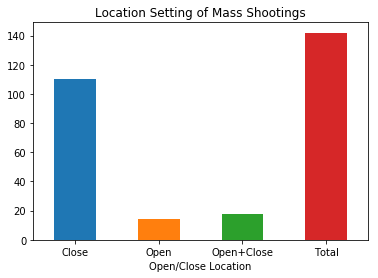

In [188]:
oc_locs.plot.bar(title='Location Setting of Mass Shootings', rot=0)

# xs= [i + 0.1 for i, _ in enumerate(oc_locs)]
# plt.bar(xs, oc_locs)
# plt.title('Location Setting of Mass Shootings')
# plt.xticks([i + .2 for i, _ in enumerate(oc_locs)], oc_locs.index)
# plt.show()

In [228]:
weapon_freqs = df['Weapon Type'].value_counts()
weapon_freqs.to_frame()
# Would probably want to do some type of text searching to aggregate weapon types together as you had prior I believe

,Weapon Type
Semi-automatic Handgun,34
Unknown,20
Handgun,18
Semi-automatic Rifle,13
"Semi-automatic Handgun, Handgun",8
"Semi-automatic Rifle, Semi-automatic Handgun",8
"Semi-automatic Rifle, Semi-automatic Handgun, Shotgun",6
Shotgun,4
"Semi-automatic Rifle, Handgun",3
"Rifle, Shotgun",3


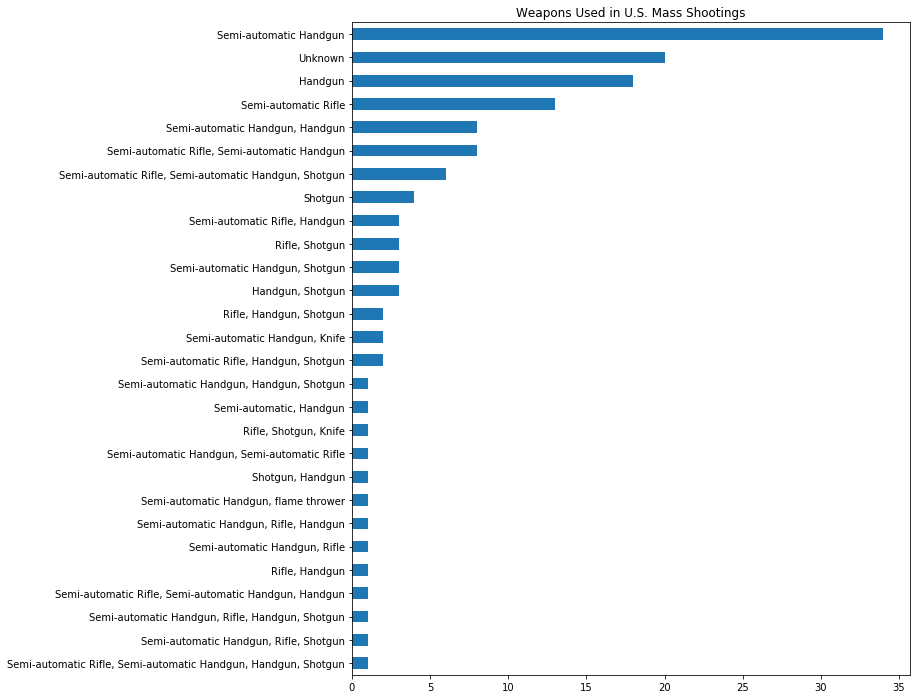

In [229]:
# More on colormaps here: https://matplotlib.org/tutorials/colors/colormaps.html
# Basically took the first color in the colormap row since there is only one bar class I guess
weapon_freqs.sort_values().plot(title='Weapons Used in U.S. Mass Shootings', 
                                kind='barh', figsize=(10, 12), colormap='tab10')

In [146]:
states = df['State'].value_counts()
states

California              19
Texas                   15
Washington              11
Florida                  9
Arizona                  7
Wisconsin                6
Georgia                  5
Colorado                 5
New York                 5
Illinois                 5
Kentucky                 4
North Carolina           4
Minnesota                3
Connecticut              3
Pennsylvania             3
Michigan                 3
Nevada                   3
Oklahoma                 3
Alabama                  2
Missouri                 2
Virginia                 2
South Carolina           2
Ohio                     2
Oregon                   2
Iowa                     1
Maine                    1
New Jersey               1
Albuquerque              1
West Virginia            1
Kansas                   1
Arkansas                 1
Louisiana                1
Montana                  1
Nebraska                 1
District of Columbia     1
Hawaii                   1
Massachusetts            1
S

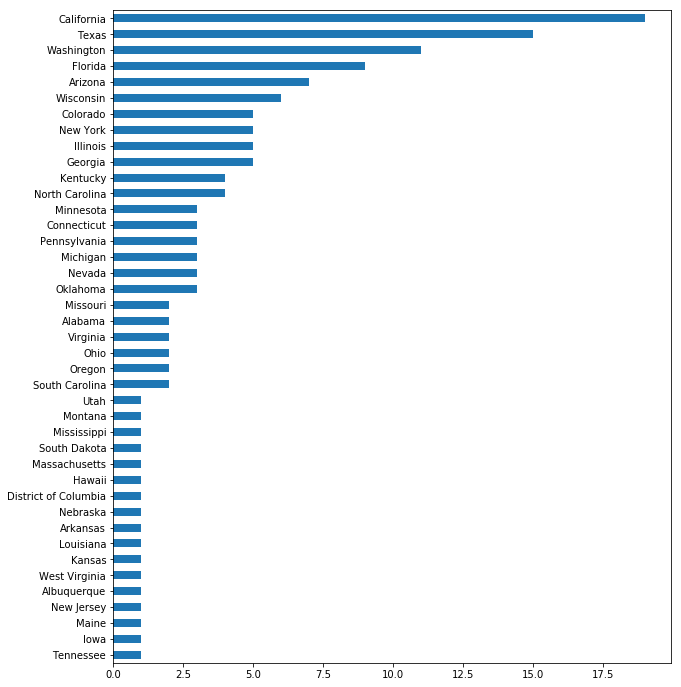

In [230]:
states.sort_values().plot.barh(figsize=(10, 12), colormap='tab10')

In [231]:
df['Mental Health Issues'].value_counts().to_frame()

,Mental Health Issues
Yes,64
No,44
Unknown,26
Unclear,7
unknown,1


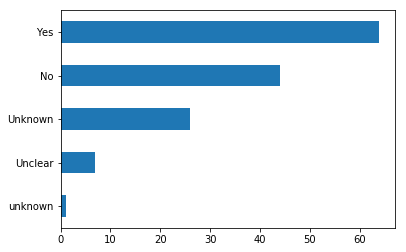

In [237]:
df['Mental Health Issues'].value_counts().sort_values().plot.barh(colormap='tab10')